# Assignment 3
Name: Metin

Surname:DEMİR

Student ID:21526902

# Part I: Theory Questions

# Question 1

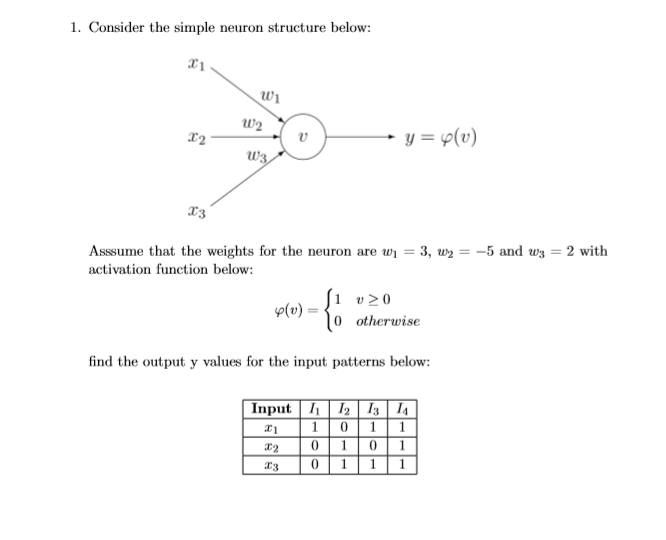

# Answer 1

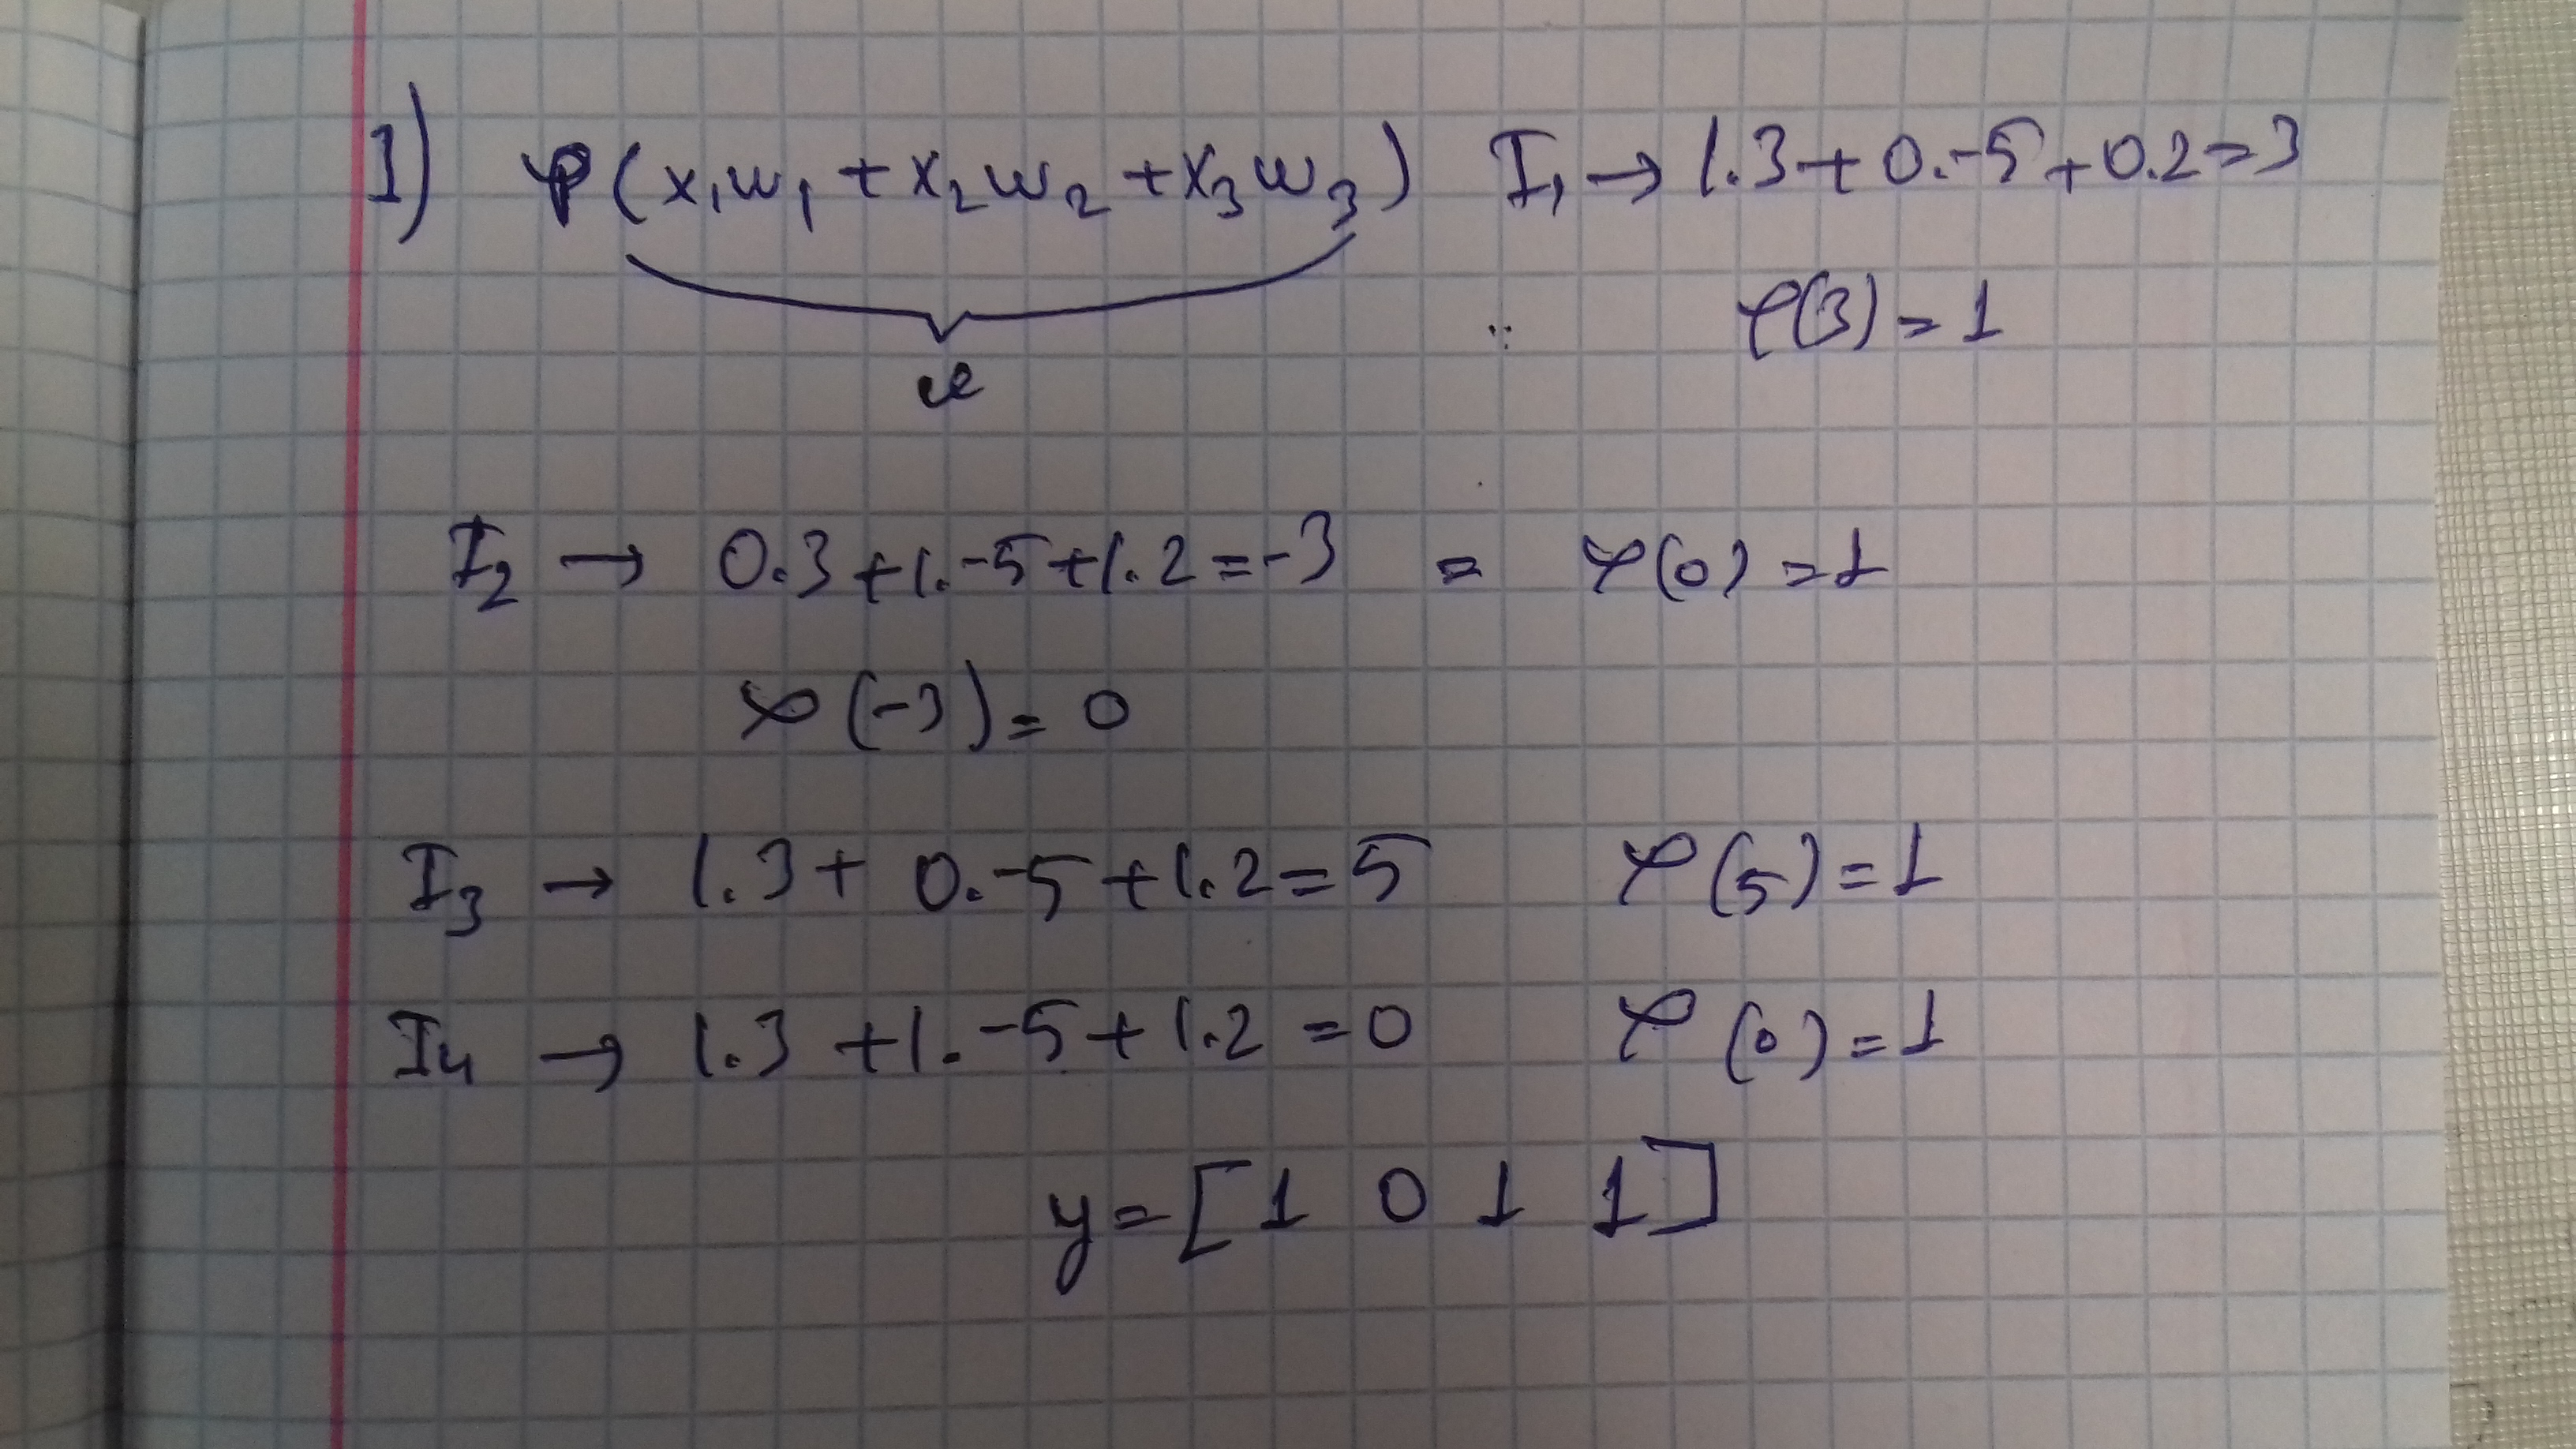

# Question 2

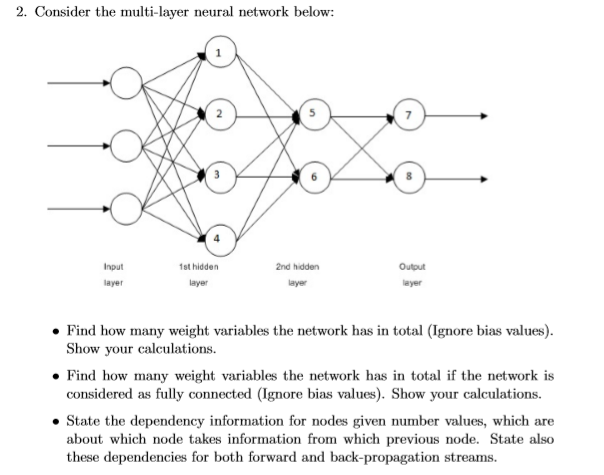

# Answer 2

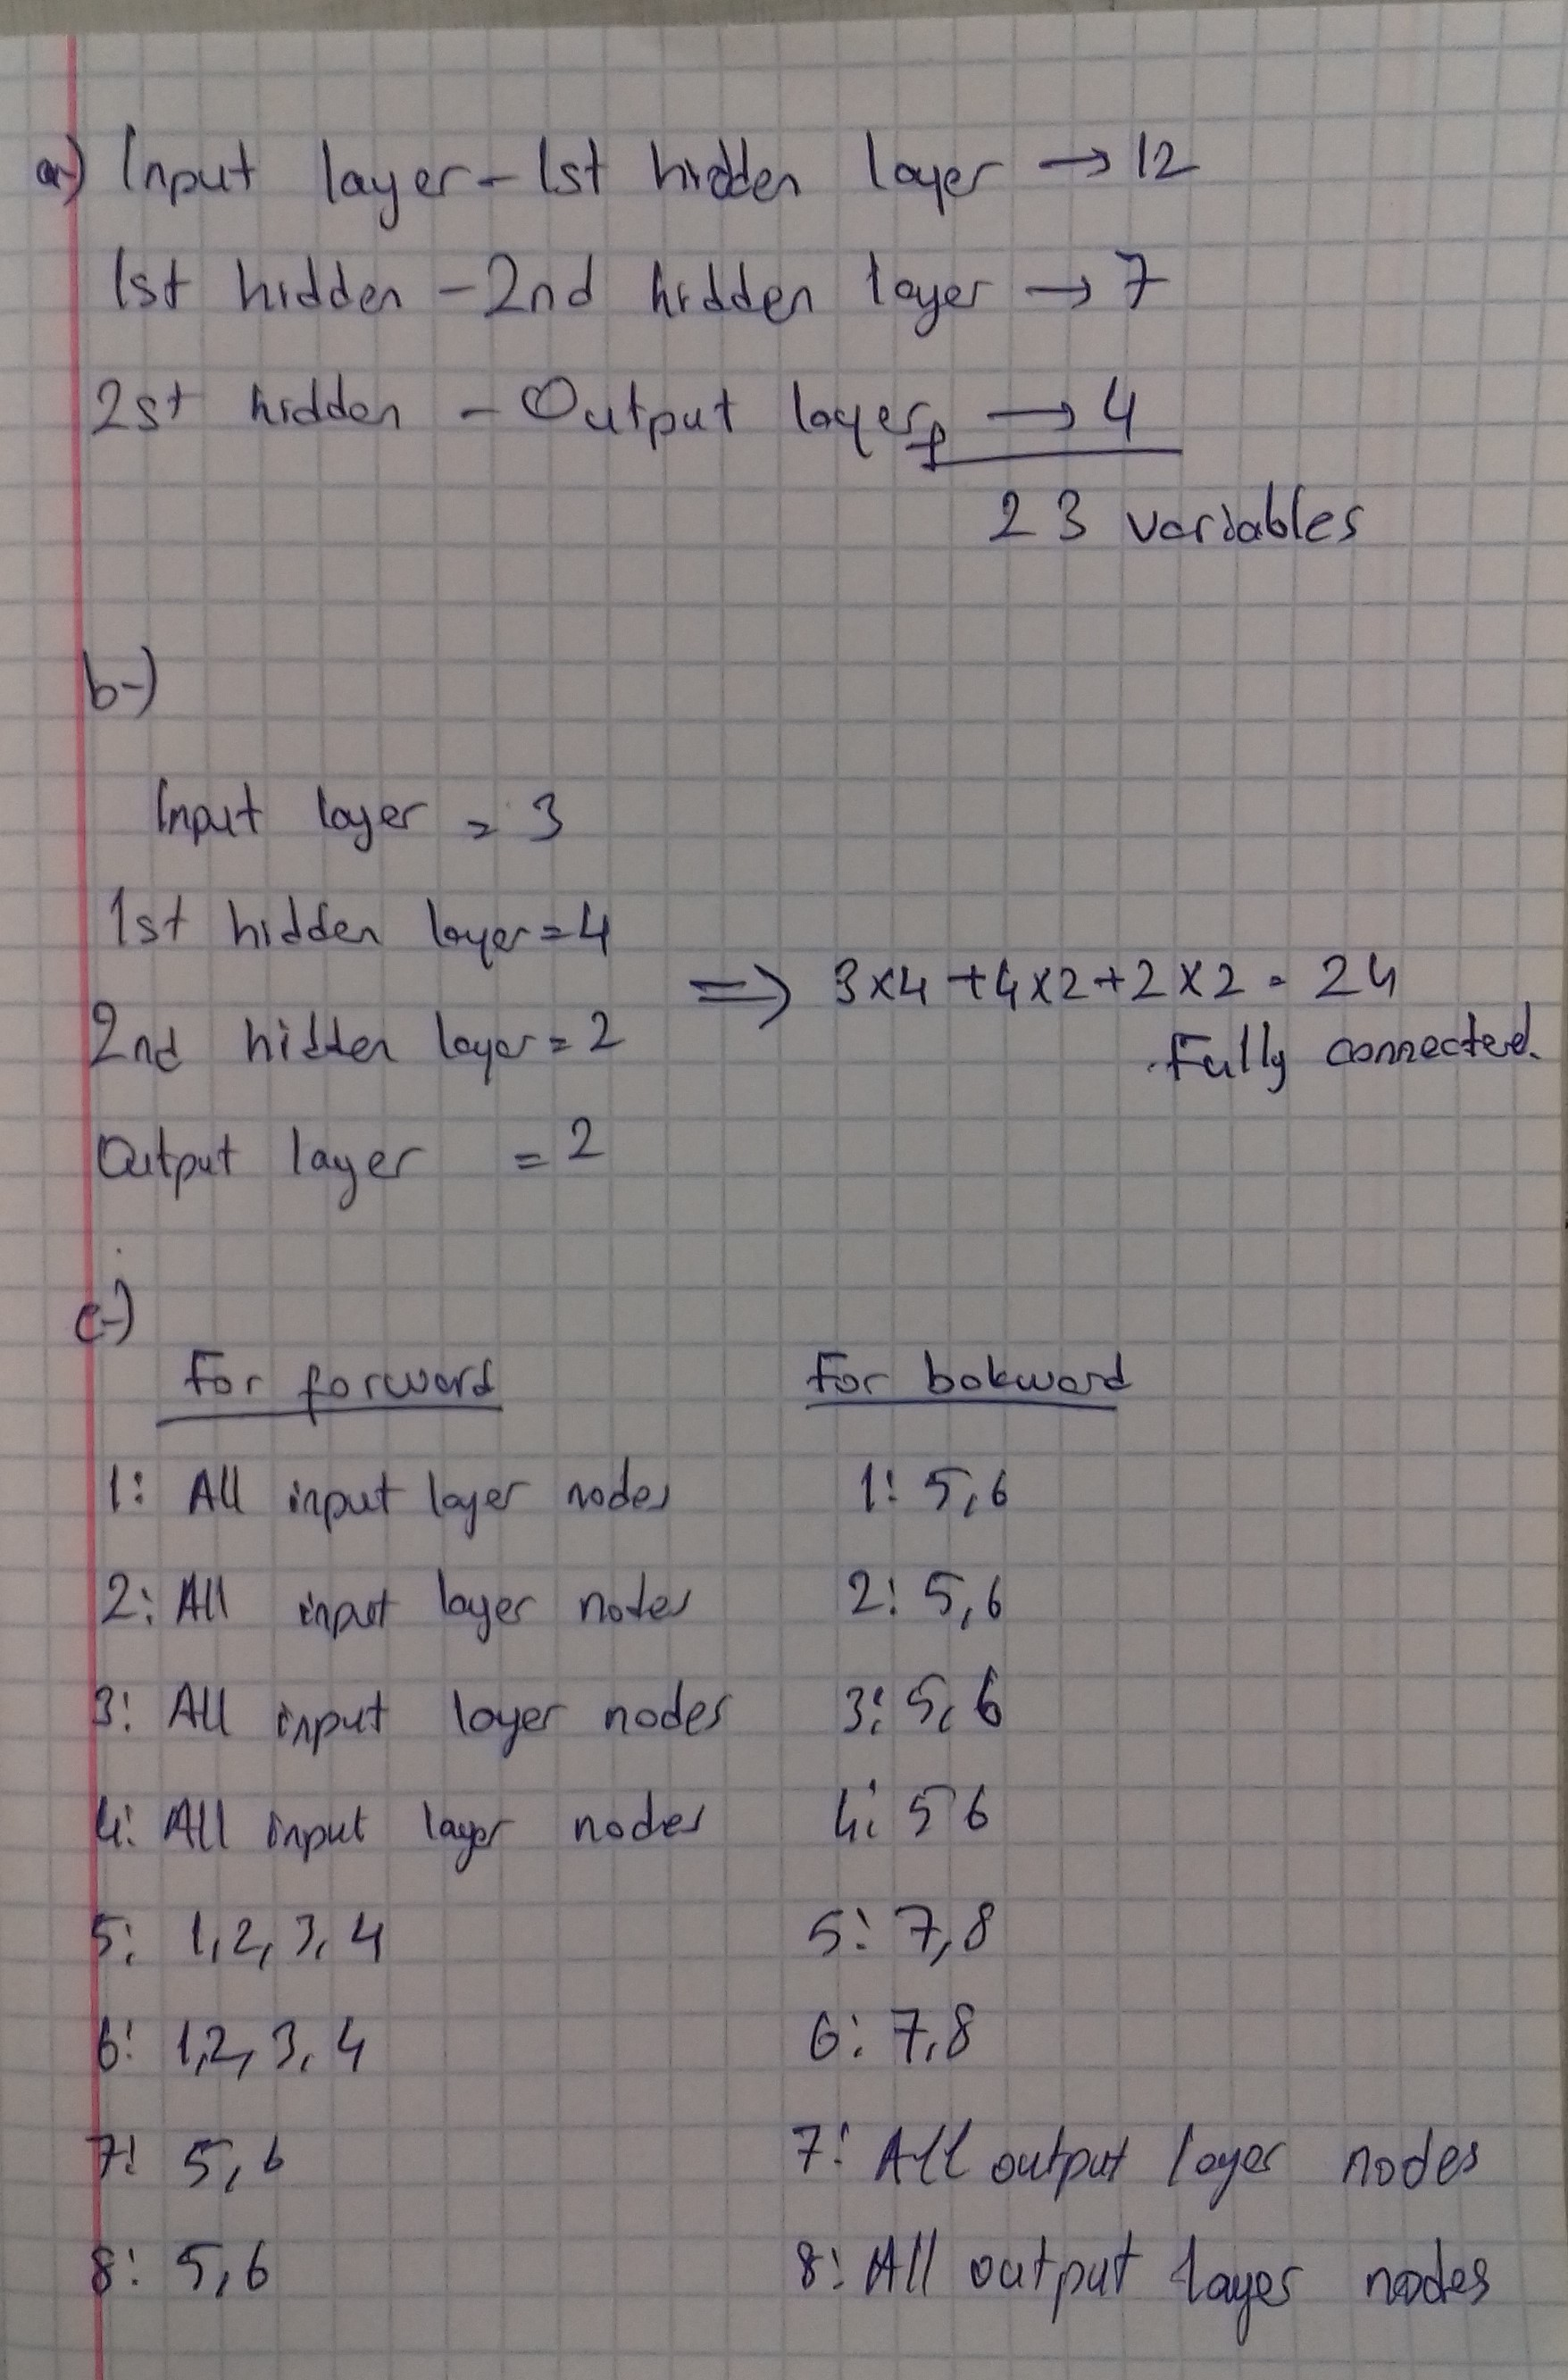

# Question 3

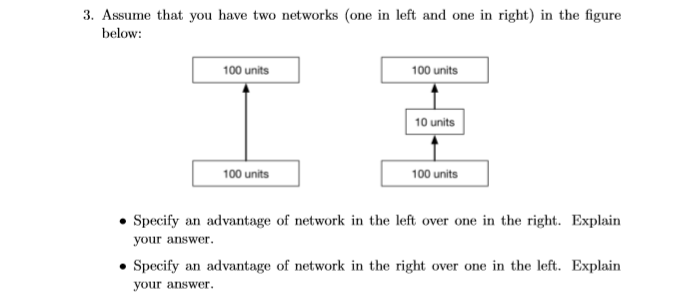

# Answer 3

Single layer can be used only for simply problems. It has a fast computation time but it does not has a complexity.

Second neural network has a hidden layer.It can be used for difficult and complex problems but this process may takes a long training time.

# Question 4

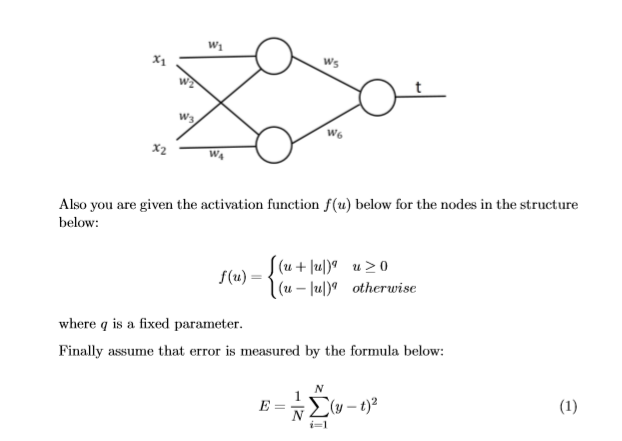

# Question 5 

***Where y is the desired output and t is the actual output.***

***• Write the gradient formulas of the error with respect to the all weight parameters. Show your steps properly.***

***• For q = 1, state that whether the model becomes to a linear regression model or not. Explain why or why not.***


5. Fill the blanks with T(True) or F(False) for the statements below, also explain your reason:

***• In every condition, a perceptron network perfectly learns a linearly separable function through a ﬁnite number of training steps. (True)***

***• Single perceptron can compute the XOR function. (False)***

Single layer perceptrons are only capable of learning linearly separable patterns

***• In backpropagation learning, the model should start with a small learning parameter and slowly increase it while it is in the learning process. (False)***

t is wrong for the learning rate to start small and learn slowly 
or to learn very fast. We should find an average value. If the learning rate is small, it is very slow to learn and takes a lot of time.


# PART II: Classiﬁcation of Herbs using Neural Network

In [158]:
from PIL import Image
import glob
import pandas as pd
import numpy as np
import fnmatch
import os
import bigfloat




In [159]:
class NeuralNetwork():
    
    def __init__(self,size):
        np.random.seed(1)
        
        self.synaptic_weights = 2 * np.random.random((10880, size)) - 1
        print(len(self.synaptic_weights))
        for i in range(size):
            
            print(len(self.synaptic_weights[i]))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        for iteration in range(training_iterations):
            output = self.think(training_inputs)

           
            error = training_outputs.astype(float) - output.astype(float)
            
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


In [160]:



def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint



In [161]:
if __name__ == "__main__":
    
    image_folder_name='test'
    
    df=pd.read_csv('Train_Info.csv',sep=',',names=['Id','Class'])
    row, column = df.shape
    print("Train data has {} headlines ".format(row))
    #train_df   --->>  Train data
    train_df=df.iloc[  :int(row*99/100),:]
    #train_df   --->>  Test data
    test_df=df.iloc[ int(row*99/100):,:]
    

    
    

    #print(mat)
    labels=[]
    result_array = []
    for path, dirs, files in os.walk(os.path.abspath(image_folder_name)):
        for filename in fnmatch.filter(files, "*.jpg"):
            im=Image.open(image_folder_name+'/'+filename)
            
            filename=filename.split('.')
            filename=filename[0]
            pix_val = list(im.getdata())
            
            result=[]
            for rgb in pix_val:
                result.append(getIfromRGB(rgb))
            
            if len(result)==10880:
          
                result_array.append(result)
                label=train_df.loc[train_df['Id']==filename, 'Class'].values.astype('U')
                label=label[0]
                labels.append(label)
            #print('file id : -{}- label is : -{}-'.format(filename,label))
            
    neural_network = NeuralNetwork(len(result_array))
    result_array = np.array(result_array)
    labels = np.array(labels)
    labels=labels.T
    neural_network.synaptic_weights
    neural_network.train(result_array, labels, len(labels))
    
    
    print(result_array)
    print(labels)
    #neural_network.train(result_array, labels, len(labels))
    #print(result_array)


Train data has 34226 headlines 
10880
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
[[     0 394758      0 ...      0  65793      0]
 [920589  65536  65536 ...      0      0  65793]
 [394245 591624  65536 ...      0 460551      0]
 ...
 [ 65536 854796 262659 ...      0      0  65793]
 [196866 262659 789003 ...  65536 591878  65536]
 [394245  65536 591624 ... 723464 131328  65536]]
['0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '0' '0'
 '0']


c:\users\metin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
